### FACE DETCTION

**In This notebook i am planning to do some face detction related basic things**
**for that i reading a xml file  with already pretrained with detection algorithms based on some data set**
**so i going to read data which i named as cascade i adding it in my git u can download and read it**

**1, At first let's check how we can detect a Face from an image**

In [48]:
import cv2 as cv

In [49]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
#reading cascade algorithm
face_cascade=cv.CascadeClassifier(r"E:\opencv/cascade.xml")

In [51]:
face_cascade

< cv2.CascadeClassifier 0000017400CFD370>

In [52]:
#now i reading an image from the folder

img= cv.imread(r"C:\Users\arjunkurup\OneDrive\Pictures/cvpic.png")

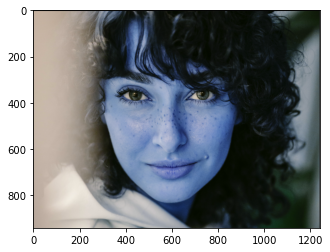

In [53]:
plt.imshow(img)

**I already says that why it become bluish tone ,cuz cv read in BGR form While Matplot print in Rgb Form**

In [54]:
#Now lets convert image into Rgb 

image=cv.cvtColor(img,cv.COLOR_BGR2RGB)

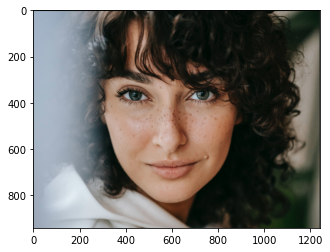

In [55]:
plt.imshow(image)
plt.show()

**Next i am going to detect face from this image, for that i need to use detectmultiscale function
from cascade xml file which is stored inside variable face_cascade**


In [56]:
facedetct= face_cascade.detectMultiScale(image,1.1,4,minSize=(30,30))

In [57]:
#in here min size means the rectangle size , and 1.1 means the saclefactor

In [58]:
facedetct

array([[226, 128, 698, 698]])

**see while we run that varible we get 4 array value means inside 
this cordinates the face is detected**

**Now if you want to know how much face detct in from image for that just take the length
of the variable**

In [59]:
len(facedetct)

1

In [60]:
# so here it saying only one face i in your image and that is detectd

**Now lets draw a box on our image to check the cordinate that we get is right on face or not**

In [61]:
for (x,y,w,h) in facedetct:
    cv.rectangle(image,(x-5,y-5),(x+w+5 , y+h+5),color=(0,255,0),thickness=3)

In [62]:
# so in above line i use for loop to draw a rectangle on my rgb image to see the cordinate we get are right or wrong
#so in that command x,y i represnt as codinate values,ie the value we get after running detectMultiScale function
#and w,h represent widhth and height
#since i drwaing reactangle in image i call rectangle function
# then i reduce 5 pixel ,//actualy it's your choice you can either reduce or increse any number 
# i just reduce simple reduce if u didnt reduce also no problem i just reduce so that if any error in variance length not affect it
# Actualy insted of pt1 and pt2 i giving cordinate that we get along with my own dimension value 
#x+w+5 means width of rectangle i giving
#y+h+5 means height of the reactangle


**Now lets check cordinate is actualy pointing towards face or not**

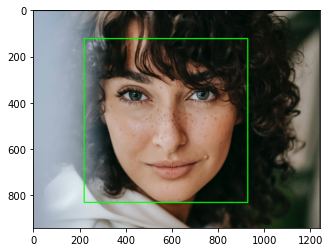

In [63]:
plt.imshow(image)
plt.show()

**Yes , so i conclude that  the cordinate that we get is perfectly fit in the face**

**Now i am going to checK How a face detction work in video**

**A video is combination of set of frames of set of images**
**,Due to that we need to check each frame and want to detct face on it**

**Step 1 : in this step iam going read the video , for reading a video i use Video
Function from cv**

In [64]:
video=cv.VideoCapture(r'E:\opencv/classroom.mp4')
#additonal hint
# if you type video=cv.VideoCapture(0) put 0 inplace of location you can face detct yoursel threw web cam
#this videocapute(0) is for accesing your web camm to see live face detction

**Step2 : This is a long step to see but it's simple, We know that
video is a combination of set of frames of images and for face detction we 
need to check each frame to see face detct or not , for that is using while loop
inside while i storing each frame in Variable name frame**

**next i converting Bgr to gray scale image ,for increasing the performnce in detection,
i mean gray scale image reduce the model complexity , ie compared to rgb image in gray scale image
we can fastly detct**

**After that the same step i use in image face detction , ie using detctMultiscale
it show the scale point around face after that we checking the point  by creating the 
rectangle on each frame**

In [65]:
while True:
    ret,frame = video.read()
    gray = cv.cvtColor(frame,cv.COLOR_BGR2GRAY)
    face=face_cascade.detectMultiScale(gray,1.1,4,minSize=(30,30))

    for (x,y,w,h) in face:
        cv.rectangle(frame,(x,y),(x+w,y+h),color=(0,255,0),thickness=2)
    
    cv.imshow('videoface detction',frame)
    if cv.waitKey(1)& 0xFF ==27:
        break
video.release()
cv.destroyAllWindows()

### Eye Detction From an image


**Inhere working is same as we detct face in an image only diffent is we want to read
cascade eye algorithm xml file**

In [66]:
img=cv.imread(r'C:\Users\arjunkurup\OneDrive\Pictures/cvpic.png')

In [67]:
image=cv.cvtColor(img,cv.COLOR_BGR2RGB)

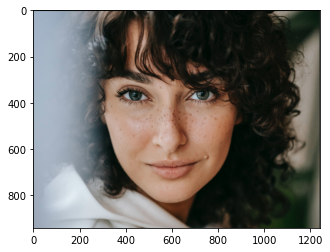

In [68]:
plt.imshow(image)

In [69]:
#Reading xml file with eye detction cascade algorith
#You can find this type trained xml file in github -> opencv/data/haarcascades/
cascadeEye=cv.CascadeClassifier(r"E:\opencv/haarcascade_eye.xml")

In [70]:
eye=cascadeEye.detectMultiScale(image,1.1,4,minSize=(30,30))

In [71]:
eye

array([[ 358,  298,  143,  143],
       [ 647,  281,  166,  166],
       [ 715,  292,  161,  161],
       [1117,  417,   50,   50]])

In [72]:
for (x,y,w,h)in eye:
    cv.rectangle(image,(x,y),(x+w,y+h),color=(0,255,0),thickness=3)


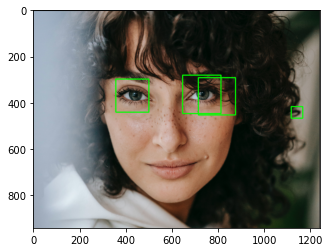

In [73]:
plt.imshow(image)

In [74]:
# While see this image you can find one more rectangle overlap in eye it is because
# this algorithm is trained with minimum data set so some little accurcy problem will occur

####  Eye Detction From web Cam

**In  this method i using web cam to see whether my eye is correctly detcting or not**

#### Step 1 : capturing the video :-
 
 **ie in previous method i mention that if u want access webcam insted of location give (0)**

In [77]:
videoweb= cv.VideoCapture(0)

**Step are same way of face detct in video same step are going on only diffrence is we using
cascadeEye variable   where algorithm of eye  stored**

In [80]:

while True:
    ret,frame = videoweb.read()
    gray=cv.cvtColor(frame,cv.COLOR_BGR2GRAY)
    web=cascadeEye.detectMultiScale(gray,1.1,4,minSize=(30,30))


    for (x,y,w,h) in web:
        cv.rectangle(frame,(x,y),(x+w,y+h),color=(0,255,0),thickness=3)
    cv.imshow('webeye',frame) 
    if cv.waitKey(1)& 0xFF ==27:
        break
video.release()
cv.destroyAllWindows()   
        